In [4]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [5]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [6]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=~newMask
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<17
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

eq_tests=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, P=cpx_Glass['P_kbar_x'], T=cpx_Glass['T_K_x'])

sigma=1.5
Eq_Mask=((eq_tests['Delta_EnFs_Mollo13']<0.05)
        &(eq_tests['Delta_Kd_Put2008']<0.08) 
        &(eq_tests['Cation_Sum_Cpx'].between(3.95, 4.05))
         &(cpx_Glass['N_meas_Cpx']>=5)
         & (cpx_Glass['H2O_Liq']>0)
        
        )

xT=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask]
x=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask]
x_All=cpx_Glass['P_kbar_x'].loc[Press_new]
xT_All=cpx_Glass['T_K_x'].loc[Press_new]

## Masked Cpxs and Glasses
x_T_Mask=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)
x_P_kbar_Mask=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)

Cpx_Mask=myCpxs1.loc[Press_new&Eq_Mask].reset_index(drop=True)
Liq_Mask=myLiquids1.loc[Press_new&Eq_Mask].reset_index(drop=True)
cpx_Glass_Mask=cpx_Glass.loc[Press_new&Eq_Mask].reset_index(drop=True)

Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\AppData\Local\Temp\ipykernel_37320\1746925873.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## What are different filters doing

In [7]:
print('initial number of experiments')
sum(Press_new)

initial number of experiments


543

In [8]:
print('number thrown out for Kd')
print(sum(Press_new&~(eq_tests['Delta_Kd_Put2008']<0.08)))

number thrown out for Kd
123


In [9]:
print('number thrown out for EnFs')
print(sum(Press_new&~(eq_tests['Delta_EnFs_Mollo13']<0.05)))

number thrown out for EnFs
71


In [10]:
print('number thrown out for cation sums')
print(sum(Press_new&~(eq_tests['Cation_Sum_Cpx'].between(3.95, 4.05))))



number thrown out for cation sums
20


In [11]:
print('number thrown out based on number of analyses')
print(sum(Press_new&~(cpx_Glass['N_meas_Cpx']>=5)))

number thrown out based on number of analyses
156


In [12]:
print('Number thrown out based on being dry, or no reported water contents')
print(sum(Press_new&~ (cpx_Glass['H2O_Liq']>0)))
   

Number thrown out based on being dry, or no reported water contents
53


In [13]:
print('remaining after filters')
len(Cpx_Mask)

remaining after filters


214

In [14]:
cpx_Glass_Mask['Citation_x'].unique()

array(['Hamada2008_notinLEPR', 'Kraw2013_notinLEPR',
       'Firth2019_notinLEPR', 'Erdmann2016_notinLEPR',
       'Parmon2011_notinLEPR', 'Berndt2005_notinLEPR',
       'Feig2010_notinLEPR', 'Pichavent2007_notinLEPR',
       'Mandler2013_notinLEPR', 'Nandekar2014_notinLEPR',
       'Blatter2013_notinLEPR', 'Blatter2017_notinLEPR',
       'Melekhova2015_notinLEPR', 'Ulmer2018_notinLEPR',
       'Almeev2013_notinLEPR', 'Cadoux2014_notinLEPR',
       'Parat2014_notinLEPR', 'Koepke2018_notinLEPR',
       'Husen2016_notinLEPR', 'Erdman_Koepke2016_notinLEPR',
       'Waters2020_notinLEPR', 'Marxer2022_notinLEPR',
       'Nakatani2022_notinLEPR', 'Blatter2023_notinLEPR'], dtype=object)

## Reviewer question - about no atmospheric ones
- Make a supporting figure showing presusres

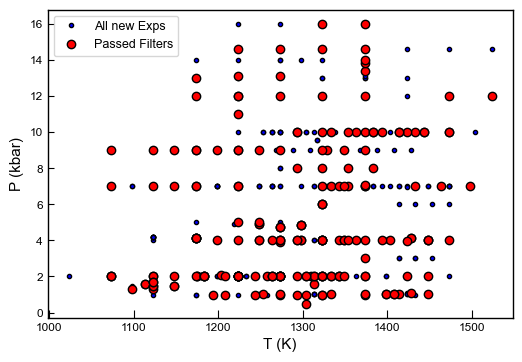

In [15]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,4))
ax1.plot(cpx_Glass['T_K_x'].loc[Press_new],cpx_Glass['P_kbar_x'].loc[Press_new], '.k', mfc='blue', label='All new Exps');
ax1.plot(cpx_Glass_Mask['T_K_x'],cpx_Glass_Mask['P_kbar_x'], 'ok', mfc='red', label='Passed Filters');
ax1.set_xlabel('T (K)')
ax1.set_ylabel('P (kbar)')
ax1.legend()
fig.savefig('Exp_Filtering.png', dpi=200)

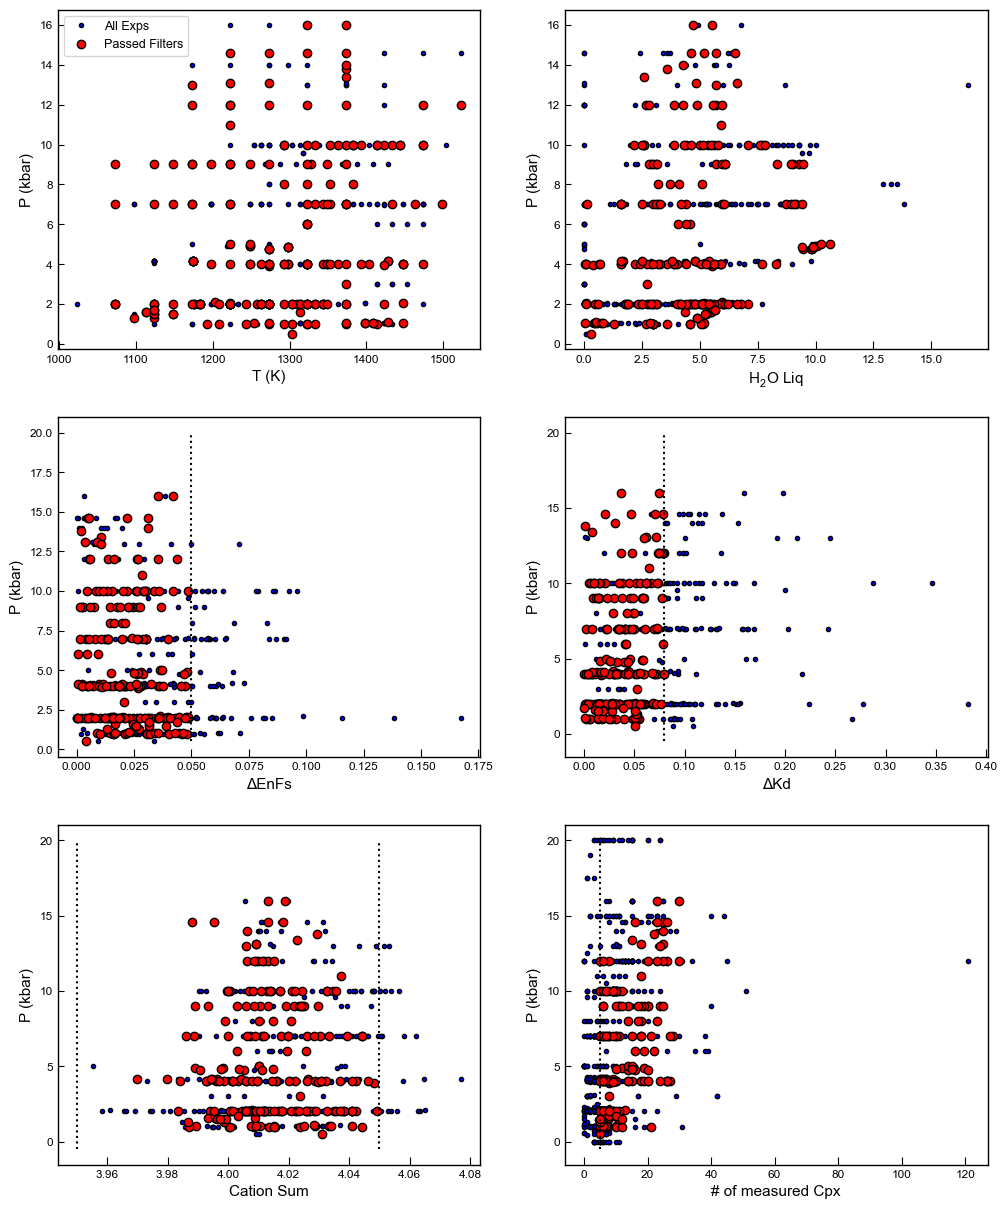

In [16]:
fig, ((ax0, ax0b),(ax1, ax2), (ax3, ax4)) = plt.subplots(3, 2, figsize = (12,15))


ax0.plot(cpx_Glass['T_K_x'].loc[Press_new],cpx_Glass['P_kbar_x'].loc[Press_new], '.k', mfc='blue', label='All Exps');
ax0.plot(cpx_Glass_Mask['T_K_x'],cpx_Glass_Mask['P_kbar_x'], 'ok', mfc='red', label='Passed Filters');
ax0.legend()
ax0.set_xlabel('T (K)')
ax0.set_ylabel('P (kbar)')

ax0b.plot(cpx_Glass['H2O_Liq'].loc[Press_new],cpx_Glass['P_kbar_x'].loc[Press_new], '.k', mfc='blue', label='All Exps');
ax0b.plot(cpx_Glass_Mask['H2O_Liq'],cpx_Glass_Mask['P_kbar_x'], 'ok', mfc='red', label='Passed Filters');
ax0b.set_xlabel('H$_2$O Liq')
ax0b.set_ylabel('P (kbar)')

ax1.plot(eq_tests['Delta_EnFs_Mollo13'].loc[Press_new],
        cpx_Glass['P_kbar_x'].loc[Press_new], '.k', mfc='blue', label='Passed Filters')
ax1.plot(eq_tests['Delta_EnFs_Mollo13'].loc[Press_new&Eq_Mask],
        cpx_Glass_Mask['P_kbar_x'], 'ok', mfc='red', label='Passed Filters')
ax1.plot([0.05, 0.05], [0.5, 20], ':k')
ax1.set_xlabel('ΔEnFs')
ax1.set_ylabel('P (kbar)')

ax2.plot(eq_tests['Delta_Kd_Put2008'].loc[Press_new],
        cpx_Glass['P_kbar_x'].loc[Press_new], '.k', mfc='blue', label='Passed Filters')
ax2.plot(eq_tests['Delta_Kd_Put2008'].loc[Press_new&Eq_Mask],
        cpx_Glass_Mask['P_kbar_x'], 'ok', mfc='red', label='Passed Filters')
ax2.plot([0.08, 0.08], [-0.5, 20], ':k')
ax2.set_xlabel('ΔKd')
ax2.set_ylabel('P (kbar)')

ax3.plot(eq_tests['Cation_Sum_Cpx'].loc[Press_new],
        cpx_Glass['P_kbar_x'].loc[Press_new], '.k', mfc='blue', label='Passed Filters')
ax3.plot(eq_tests['Cation_Sum_Cpx'].loc[Press_new&Eq_Mask],
        cpx_Glass_Mask['P_kbar_x'], 'ok', mfc='red', label='Passed Filters')
ax3.plot([3.95, 3.95], [-0.5, 20], ':k')
ax3.plot([4.05, 4.05], [-0.5, 20], ':k')
ax3.set_xlabel('Cation Sum')
ax3.set_ylabel('P (kbar)')

ax4.plot(cpx_Glass['N_meas_Cpx'],
        cpx_Glass['P_kbar_x'], '.k', mfc='blue', label='Passed Filters')
ax4.plot(cpx_Glass_Mask['N_meas_Cpx'],
        cpx_Glass_Mask['P_kbar_x'], 'ok', mfc='red', label='Passed Filters')
ax4.plot([5, 5], [-0.5, 20], ':k')
ax4.set_xlabel('# of measured Cpx')
ax4.set_ylabel('P (kbar)')
fig.savefig('Supplement_Filters.png', dpi=200)

## Find ones in Jorgenson dataset - so aren't testing on ones that were used in calibration

In [13]:
InJorg=(cpx_Glass_Mask['Citation_x'].str.contains('Kraw2013')
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Berndt2005')   
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Feig2010')   
        
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Nandekar2014_notinLEPR')   

    |
     cpx_Glass_Mask['Citation_x'].str.contains('Melekhova2015_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Ulmer2018')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Almeev2013')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Parat2014_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Husen2016_notinLEPR')      

       
       )

cpx_Glass_Mask_Jorg=cpx_Glass_Mask.loc[~InJorg].reset_index(drop=True)
Cpx_Mask_Jorg=Cpx_Mask.loc[~InJorg].reset_index(drop=True)
Liq_Mask_Jorg=Liq_Mask.loc[~InJorg].reset_index(drop=True)
x_T_Mask_Jorg=x_T_Mask.loc[~InJorg].reset_index(drop=True)

cpx_Glass_Mask_Jorg['Citation_x'].unique()

array(['Hamada2008_notinLEPR', 'Firth2019_notinLEPR',
       'Erdmann2016_notinLEPR', 'Parmon2011_notinLEPR',
       'Pichavent2007_notinLEPR', 'Mandler2013_notinLEPR',
       'Blatter2013_notinLEPR', 'Blatter2017_notinLEPR',
       'Cadoux2014_notinLEPR', 'Koepke2018_notinLEPR',
       'Erdman_Koepke2016_notinLEPR', 'Waters2020_notinLEPR',
       'Marxer2022_notinLEPR', 'Nakatani2022_notinLEPR',
       'Blatter2023_notinLEPR'], dtype=object)

## Calculating Cpx components

In [14]:
cpx_comps=pt.calculate_clinopyroxene_liquid_components(cpx_comps=Cpx_Mask, liq_comps=Liq_Mask)

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## Calculating P and T

In [15]:
# Using the reduced dataset for Jorg
CalcJorg=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_Mask_Jorg, liq_comps=Liq_Mask_Jorg,
                                         equationP="P_Jorgenson2022_Cpx_Liq",
                                         equationT="T_Jorgenson2022_Cpx_Liq")


Calc=pt.calculate_cpx_liq_press_all_eqs(cpx_comps=Cpx_Mask, liq_comps=Liq_Mask)
Calc.head()

Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Youve selected a T-independent function
Youve selected a T-independent function
We have reset the index on Cpx and Liq comps for the Petrelli expressions
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


,"P_kbar: (P_Neave17, T_Put2008_eq33)","T_K: (P_Neave17, T_Put2008_eq33)","P_kbar: (P_Neave17, T_Put2008_eq34_cpx_sat)","T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)","P_kbar: (P_Put2008_eq30, T_Put2008_eq33)","T_K: (P_Put2008_eq30, T_Put2008_eq33)","P_kbar: (P_Put2008_eq31, T_Put2008_eq33)","T_K: (P_Put2008_eq31, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq33)","T_K: (P_Put2008_eq32c, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2003)","T_K: (P_Put2008_eq32c, T_Put2003)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq32d)","T_K: (P_Put2008_eq32c, T_Put2008_eq32d))","P_kbar: (P_Put2008_eq32c, default spreadsheet 1st cell)","P_kbar: (P_Put2008_eq32c, default spreadsheet 2 on)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq34)","T_K: (P_Put2008_eq32c, T_Put2008_eq34))",P_kbar: (P2003 P&T),T_K: (P2003 P&T),"P_kbar: (Petrelli, 2020)","T_K: (Petrelli, 2020)","P_kbar: (Jorgeson, 2022)","T_K: (Jorgeson, 2022)","T_K: (P_Put1996_eqP1, T_Put1996_eqT2)","P_kbar: (P_Put1996_eqP1, T_Put1996_eqT2)"
0,3.286774,1383.752613,3.468196,1403.935522,2.853015,1381.513759,5.341572,1394.457858,3.928279,1387.077083,7.819698,1469.001701,9.511113,1504.610431,6.607933,7.146713,5.632790,1422.961524,3.542198,1463.190975,5.298549,1384.375455,4.620689,1376.980846,1454.833594,3.915014
1,3.085978,1401.973136,3.279229,1424.006617,2.239211,1397.493766,4.976933,1412.080646,1.485561,1393.530983,5.219646,1472.143295,5.618105,1480.531920,4.063358,4.375427,2.673348,1418.537035,4.243707,1470.807790,5.768426,1417.357273,5.156706,1419.169900,1454.370265,3.660332
2,4.021323,1413.717647,4.126834,1425.346847,3.352921,1410.119985,6.452329,1426.958740,4.830457,1418.097429,7.695214,1478.408115,9.029315,1506.494459,6.649362,7.063053,5.956967,1441.813428,4.503705,1474.012611,5.743663,1414.188182,5.191811,1405.965920,1465.099469,4.662148
3,5.858916,1424.378793,6.044984,1443.814644,4.250855,1415.624124,7.066573,1431.025096,4.825058,1418.737840,7.760858,1480.544153,8.630340,1498.849050,7.003696,7.385131,5.994574,1443.359234,5.661313,1477.641249,6.824120,1426.211818,6.559458,1421.970896,1472.634124,5.780116
4,6.662773,1427.813893,6.879039,1448.565480,5.267612,1420.175502,8.172514,1436.172702,6.467734,1426.741131,9.282411,1485.997501,9.950533,1500.063222,8.540776,8.916346,7.973890,1458.449676,6.495375,1482.118136,7.315460,1425.373636,6.687587,1425.174876,1478.290852,6.895474


## Calculating statistics 

In [16]:
Temp_Stats_PN17_Teq33=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Neave17, T_Put2008_eq33)']) 
Temp_Stats_30_Teq33=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put2008_eq30, T_Put2008_eq33)']) 
Temp_Stats_31_Teq33=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put2008_eq31, T_Put2008_eq33)']) 
Temp_Stats_32c_Teq33=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put2008_eq32c, T_Put2008_eq33)']) 
Temp_Stats_P2003=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P2003 P&T)']) 
Temp_Stats_Pet=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (Petrelli, 2020)']) 
Temp_Stats_Jor=pt.calculate_R2_Tukey(x_T_Mask_Jorg, CalcJorg.T_K_calc)
Temp_Stats_32c_2003=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put2008_eq32c, T_Put2003)']) 

Temp_Stats_P1996_P1_T2=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put1996_eqP1, T_Put1996_eqT2)']) 
Temp_Stats_34_PN17=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)']) 

## 6 part figure showing different thermometers

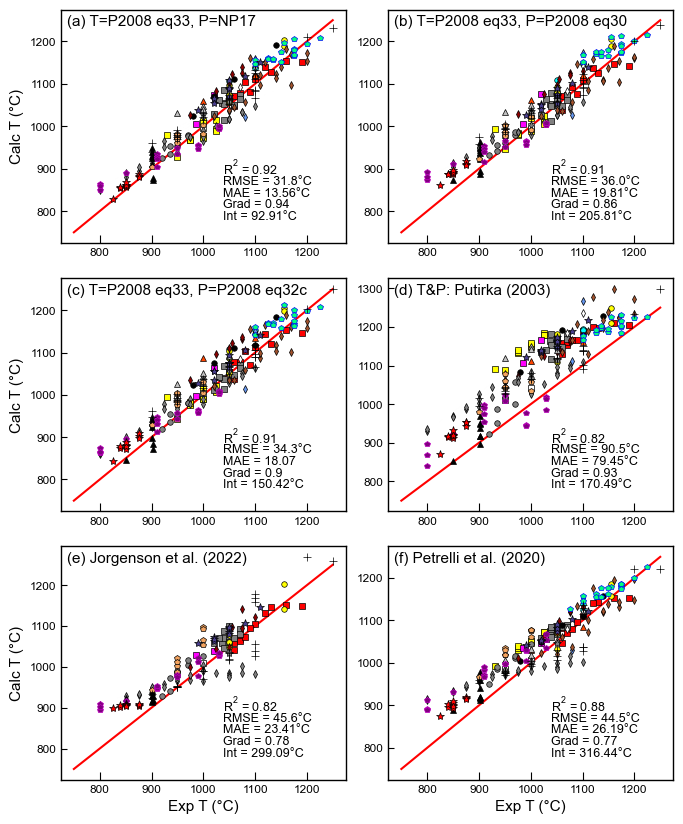

In [22]:
fig, ((ax0, ax1), (ax3, ax4), (ax2, ax5)) = plt.subplots(3,2, figsize = (7.9,10)) # adjust dimensions of figure here
lin_min=750
lin_max=1250


face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'green', 'green')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '+')
nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6, 6, 6)

ax0.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax1.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax2.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax3.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax4.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax5.plot([lin_min, lin_max], [lin_min, lin_max], '-r')



Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  
    
## Neave and putirka, eq 33
    ax0.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Neave17, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

## Eq30, eq 33
    
    ax1.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Put2008_eq30, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

 # Eq 34 - NP17   
    ax2.plot(x_T_Mask_Jorg.loc[cpx_Glass_Mask_Jorg['Citation_x']==ref]-273.15,
             CalcJorg['T_K_calc'].loc[cpx_Glass_Mask_Jorg['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    # Eq32c and eq33
    ax3.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Put2008_eq32c, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
        
        # Putirka 2003 expressions
    ax4.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P2003 P&T)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    
# Petrelli et al. (2020)
    ax5.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (Petrelli, 2020)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

        
    ncolor+=1
    nmarkers+=1   

    
### ANNOTATIONS ##########################################33
ax0.annotate("(a) T=P2008 eq33, P=NP17", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)
ax1.annotate("(b) T=P2008 eq33, P=P2008 eq30", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax2.annotate("(e) Jorgenson et al. (2022)", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax3.annotate("(c) T=P2008 eq33, P=P2008 eq32c", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)
ax4.annotate("(d) T&P: Putirka (2003)", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)
ax5.annotate("(f) Petrelli et al. (2020)", 
             xy=(0.02, 0.93), xycoords="axes fraction",  fontsize=11)

# Statistics - #############################################3


ax0.annotate("R$^{2}$ = "+str(Temp_Stats_PN17_Teq33['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax0.annotate("RMSE = "+str(Temp_Stats_PN17_Teq33['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax0.annotate("MAE = "+str(Temp_Stats_PN17_Teq33['Mean Error']) +"°C",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax0.annotate("Grad = "+str(Temp_Stats_PN17_Teq33['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax0.annotate("Int = "+str(Temp_Stats_PN17_Teq33['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)


ax1.annotate("R$^{2}$ = "+str(Temp_Stats_30_Teq33['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE = "+str(Temp_Stats_30_Teq33['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax1.annotate("MAE = "+str(Temp_Stats_30_Teq33['Mean Error']) +"°C",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("Grad = "+str(Temp_Stats_30_Teq33['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Int = "+str(Temp_Stats_30_Teq33['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)





ax2.annotate("R$^{2}$ = "+str(Temp_Stats_Jor['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE = "+str(Temp_Stats_Jor['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax2.annotate("MAE = "+str(Temp_Stats_Jor['Mean Error']) +"°C",
                           xy=(0.57, 0.20), xycoords="axes fraction", fontsize=9)
ax2.annotate("Grad = "+str(Temp_Stats_Jor['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Int = "+str(Temp_Stats_Jor['Int']) +"°C",
                           xy=(0.57, 0.10), xycoords="axes fraction", fontsize=9)



ax3.annotate("R$^{2}$ = "+str(Temp_Stats_32c_Teq33['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax3.annotate("RMSE = "+str(Temp_Stats_32c_Teq33['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax3.annotate("MAE = "+str(Temp_Stats_32c_Teq33['Mean Error']),
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)

ax3.annotate("Grad = "+str(Temp_Stats_32c_Teq33['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax3.annotate("Int = "+str(Temp_Stats_32c_Teq33['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)




ax4.annotate("R$^{2}$ = "+str(Temp_Stats_P2003['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax4.annotate("RMSE = "+str(Temp_Stats_P2003['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax4.annotate("MAE = "+str(Temp_Stats_P2003['Mean Error']) +"°C",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)

ax4.annotate("Grad = "+str(Temp_Stats_P2003['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax4.annotate("Int = "+str(Temp_Stats_P2003['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)


ax5.annotate("R$^{2}$ = "+str(Temp_Stats_Pet['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax5.annotate("RMSE = "+str(Temp_Stats_Pet['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax5.annotate("MAE = "+str(Temp_Stats_Pet['Mean Error']) +"°C",
                           xy=(0.57, 0.20), xycoords="axes fraction", fontsize=9)
ax5.annotate("Grad = "+str(Temp_Stats_Pet['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax5.annotate("Int = "+str(Temp_Stats_Pet['Int']) +"°C",
                           xy=(0.57, 0.10), xycoords="axes fraction", fontsize=9)


plt.subplots_adjust(
                    wspace=0.15, 
                    hspace=0.15)

# Eq 33 for T, Neave and Putirka, 2017 for pressure. 
#ax0.legend()
ax0.set_ylabel('Calc T (°C)')
ax2.set_ylabel('Calc T (°C)')
ax3.set_ylabel('Calc T (°C)')
ax2.set_xlabel('Exp T (°C)')
ax5.set_xlabel('Exp T (°C)')
fig.savefig('Cpx_Liq_Temp_Comparison_lABELLED.png', dpi=300)

## Lets assess how sensitive Cpx-liq thermometers actually are to Cpx

In [19]:
## Lets match up every Cpx and every liquid, and then see how much temp changes as you change the Cpx
Calc_Cpx_NP_eq33_match=pt.calculate_cpx_liq_press_temp_matching(cpx_comps=Cpx_Mask, liq_comps=Liq_Mask,
                                         P=np.nanmean(cpx_Glass_Mask['P_kbar_x']),
                                         equationT="T_Put2008_eq33", 
                                        return_all_pairs=True)

## Lets match up every Cpx and every liquid, and then see how much temp changes as you change the Cpx
Calc_Cpx_NP_eq33=pt.calculate_cpx_liq_temp(cpx_comps=Cpx_Mask, liq_comps=Liq_Mask,
                                         P=np.nanmean(cpx_Glass_Mask['P_kbar_x']),
                                         equationT="T_Put2008_eq33", 
                                        )

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=214 Cpx & N=214 Liqs, which is a total of N=45796 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=45796 Cpx-Liq matches using the specified filter. N=214 Cpx out of the N=214 Cpx that you input matched to 1 or more liquids


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## Second column for Fig 8

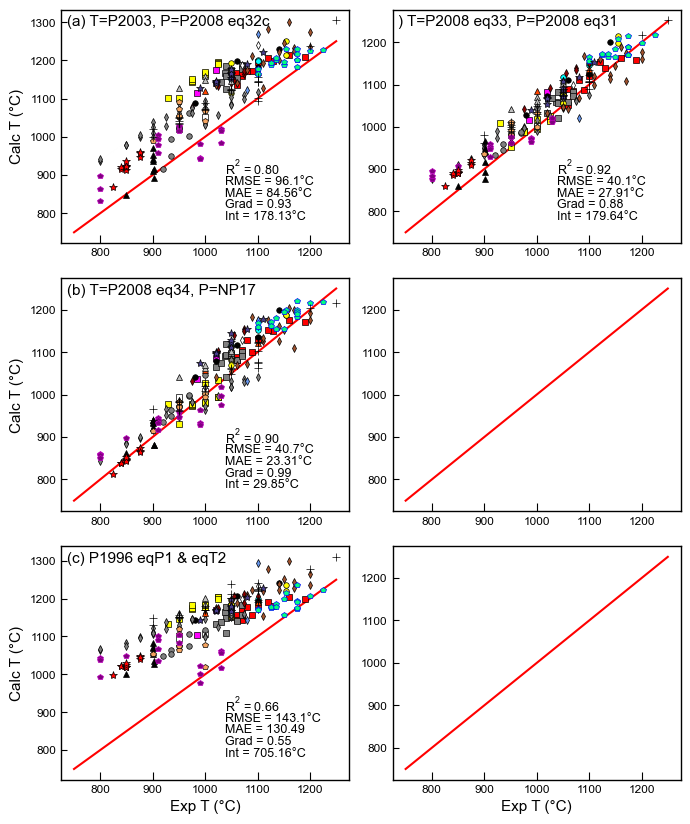

In [23]:

fig, ((ax0, ax1), (ax2, ax4), (ax3, ax5)) = plt.subplots(3,2, figsize = (8,10)) # adjust dimensions of figure here
lin_min=750
lin_max=1250

face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'green', 'green')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '+')
nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6, 6, 6)

ax0.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax1.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax2.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax3.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax4.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax5.plot([lin_min, lin_max], [lin_min, lin_max], '-r')



Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  
## Neave and putirka, eq 33
    ax0.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Put2008_eq32c, T_Put2003)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

## Eq30, eq 33
    
    ax1.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Put2008_eq31, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

 # Eq 34 - NP17   
    ax2.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    # Eq32c and eq33
    ax3.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Put1996_eqP1, T_Put1996_eqT2)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
        

        
    ncolor+=1
    nmarkers+=1   

    
### ANNOTATIONS ##########################################33
ax0.annotate("(a) T=P2003, P=P2008 eq32c", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)
ax1.annotate(") T=P2008 eq33, P=P2008 eq31", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax2.annotate("(b) T=P2008 eq34, P=NP17", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax3.annotate("(c) P1996 eqP1 & eqT2", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)

# Statistics - #############################################3


ax0.annotate("R$^{2}$ = "+str(Temp_Stats_32c_2003['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax0.annotate("RMSE = "+str(Temp_Stats_32c_2003['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax0.annotate("MAE = "+str(Temp_Stats_32c_2003['Mean Error']) +"°C",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax0.annotate("Grad = "+str(Temp_Stats_32c_2003['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax0.annotate("Int = "+str(Temp_Stats_32c_2003['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)


ax1.annotate("R$^{2}$ = "+str(Temp_Stats_31_Teq33['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE = "+str(Temp_Stats_31_Teq33['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax1.annotate("MAE = "+str(Temp_Stats_31_Teq33['Mean Error']) +"°C",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("Grad = "+str(Temp_Stats_31_Teq33['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Int = "+str(Temp_Stats_31_Teq33['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)




ax2.annotate("R$^{2}$ = "+str(Temp_Stats_34_PN17['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE = "+str(Temp_Stats_34_PN17['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax2.annotate("MAE = "+str(Temp_Stats_34_PN17['Mean Error']) +"°C",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("Grad = "+str(Temp_Stats_34_PN17['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Int = "+str(Temp_Stats_34_PN17['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)

ax3.annotate("R$^{2}$ = "+str(Temp_Stats_P1996_P1_T2['R$^{2}$']),
                           xy=(0.57, 0.29), xycoords="axes fraction", fontsize=9)
ax3.annotate("RMSE = "+str(Temp_Stats_P1996_P1_T2['RMSE_num']) +"°C",
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax3.annotate("MAE = "+str(Temp_Stats_P1996_P1_T2['Mean Error']),
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)

ax3.annotate("Grad = "+str(Temp_Stats_P1996_P1_T2['Grad']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax3.annotate("Int = "+str(Temp_Stats_P1996_P1_T2['Int']) +"°C",
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)





plt.subplots_adjust(
                    wspace=0.15, 
                    hspace=0.15)

# Eq 33 for T, Neave and Putirka, 2017 for pressure. 
#ax0.legend()
ax0.set_ylabel('Calc T (°C)')
ax2.set_ylabel('Calc T (°C)')
ax3.set_ylabel('Calc T (°C)')
ax3.set_xlabel('Exp T (°C)')
ax5.set_xlabel('Exp T (°C)')
fig.savefig('Cpx_Liq_Temp_Comparison_part2.png', dpi=300)

### Supporting fig showing mostly a liq thermometer

In [20]:
All_match=Calc_Cpx_NP_eq33_match['All_PTs']

for liq in All_match['Sample_ID_Liq'].unique():
    y=All_match['T_K_calc'].loc[All_match['Sample_ID_Liq']==liq]-273.15
    EnFs=All_match['EnFs'].loc[All_match['Sample_ID_Liq']==liq]
    lnKd=All_match['lnK_Jd_DiHd_liq_2003'].loc[All_match['Sample_ID_Liq']==liq]
    x=y*0+Calc_Cpx_NP_eq33.loc[Liq_Mask['Sample_ID_Liq']==liq].iloc[0]-273.15
    plt.plot(x, y, '.k', ms=1)
    
plt.plot([850, 1200], [850, 1200], '-r')
plt.plot([850, 1200], [850+45, 1200+45], ':r')
plt.plot([850, 1200], [850-45, 1200-45], ':r')

plt.xlabel('Calculated T °C (Exp Liq-Cpx)')
plt.ylabel('Calculated T °C (All matches, Liq-Cpx)')
plt.savefig('Supplemnet_DoesCpxMatter.png', dpi=200)

NameError: name 'Calc_Cpx_NP_eq33_match' is not defined

## Supplementary Fig - discrepency with H2O

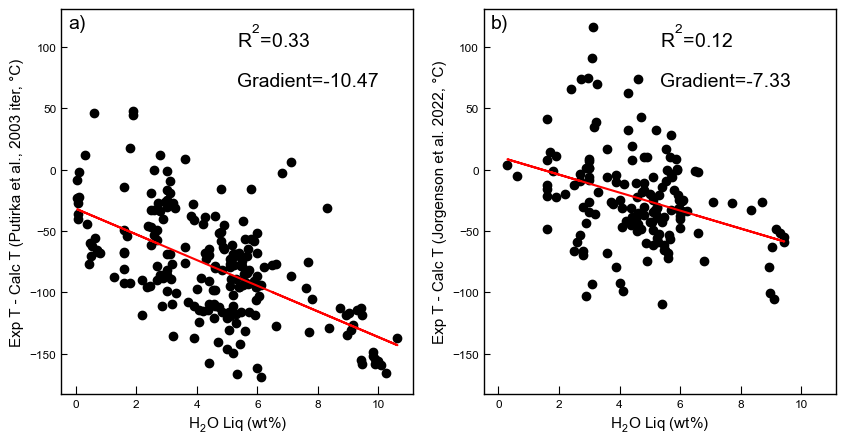

In [21]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True)

stats_Jorg=pt.calculate_R2(Liq_Mask_Jorg['H2O_Liq'],
    (x_T_Mask_Jorg)-
             (CalcJorg['T_K_calc']))

ax1.plot(Liq_Mask_Jorg['H2O_Liq'],
    (x_T_Mask_Jorg)-
             (CalcJorg['T_K_calc']),
            'ok')
ax1.plot(stats_Jorg['x_pred'], stats_Jorg['y_pred'], '-r')
ax1.set_xlabel('H$_2$O Liq (wt%)')
ax1.set_ylabel('Exp T - Calc T (Jorgenson et al. 2022, °C)')
ax1.annotate('R$^{2}$=' + str(stats_Jorg['R2']), xy=(0.5, 0.90),
                xycoords="axes fraction", fontsize=14)
ax1.annotate('Gradient=' + str(np.round(stats_Jorg['Grad'][0], 2)), xy=(0.5, 0.80),
                xycoords="axes fraction", fontsize=14)


stats_2003=pt.calculate_R2(Liq_Mask['H2O_Liq'],
    (x_T_Mask)-
             (Calc['T_K: (P2003 P&T)']))

ax2.plot(Liq_Mask['H2O_Liq'],
    (x_T_Mask)-
             (Calc['T_K: (P2003 P&T)']),
            'ok')
ax2.plot(stats_2003['x_pred'], stats_2003['y_pred'], '-r')
ax2.set_xlabel('H$_2$O Liq (wt%)')
ax2.set_ylabel('Exp T - Calc T (Putirka et al., 2003 iter, °C)')
ax2.annotate('R$^{2}$=' + str(stats_2003['R2']), xy=(0.5, 0.90),
                xycoords="axes fraction", fontsize=14)

ax2.annotate('Gradient=' + str(np.round(stats_2003['Grad'][0], 2)), xy=(0.5, 0.80),
                xycoords="axes fraction", fontsize=14)
ax2.annotate("a)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax1.annotate("b)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)

ax1.yaxis.set_tick_params(which='both', labelbottom=True)
plt.savefig('P2003_J2022_H2O_Corr.png', dpi=300)